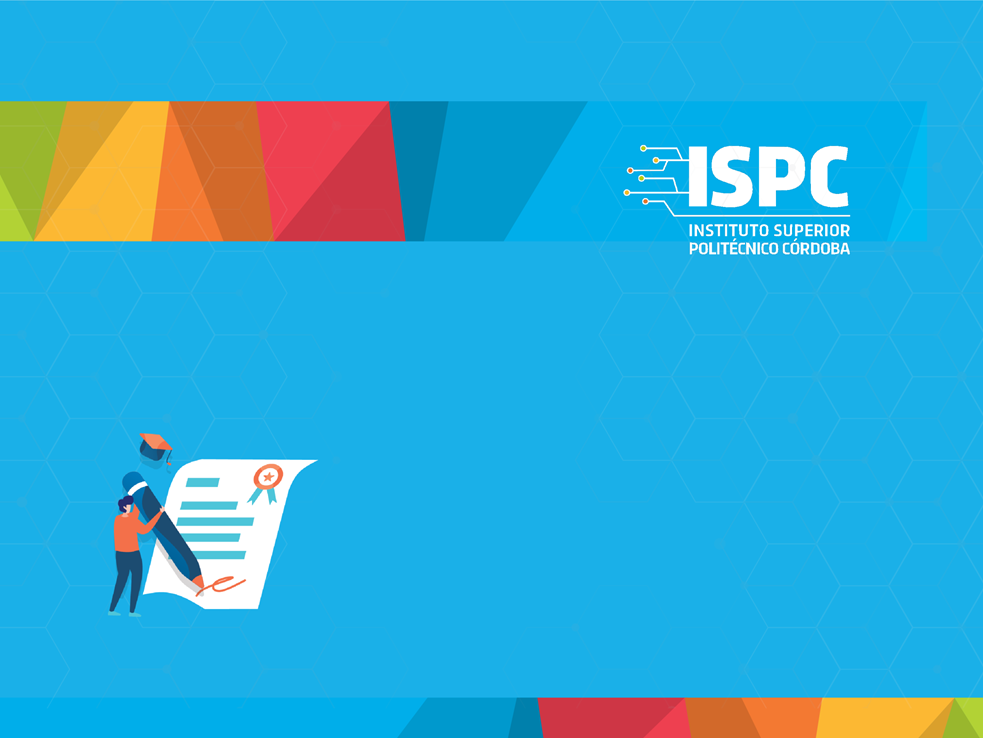

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [11]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [15]:
# Datos
# ==============================================================================
from sklearn.datasets import load_wine

wine = load_wine()
datos=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [16]:
datos.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [17]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
76,total_phenols,flavanoids,0.864564,0.864564
89,flavanoids,total_phenols,0.864564,0.864564
188,target,flavanoids,-0.847498,0.847498
97,flavanoids,target,-0.847498,0.847498
167,od280/od315_of_diluted_wines,target,-0.788230,0.788230
193,target,od280/od315_of_diluted_wines,-0.788230,0.788230
160,od280/od315_of_diluted_wines,flavanoids,0.787194,0.787194
95,flavanoids,od280/od315_of_diluted_wines,0.787194,0.787194
83,total_phenols,target,-0.719163,0.719163
187,target,total_phenols,-0.719163,0.719163


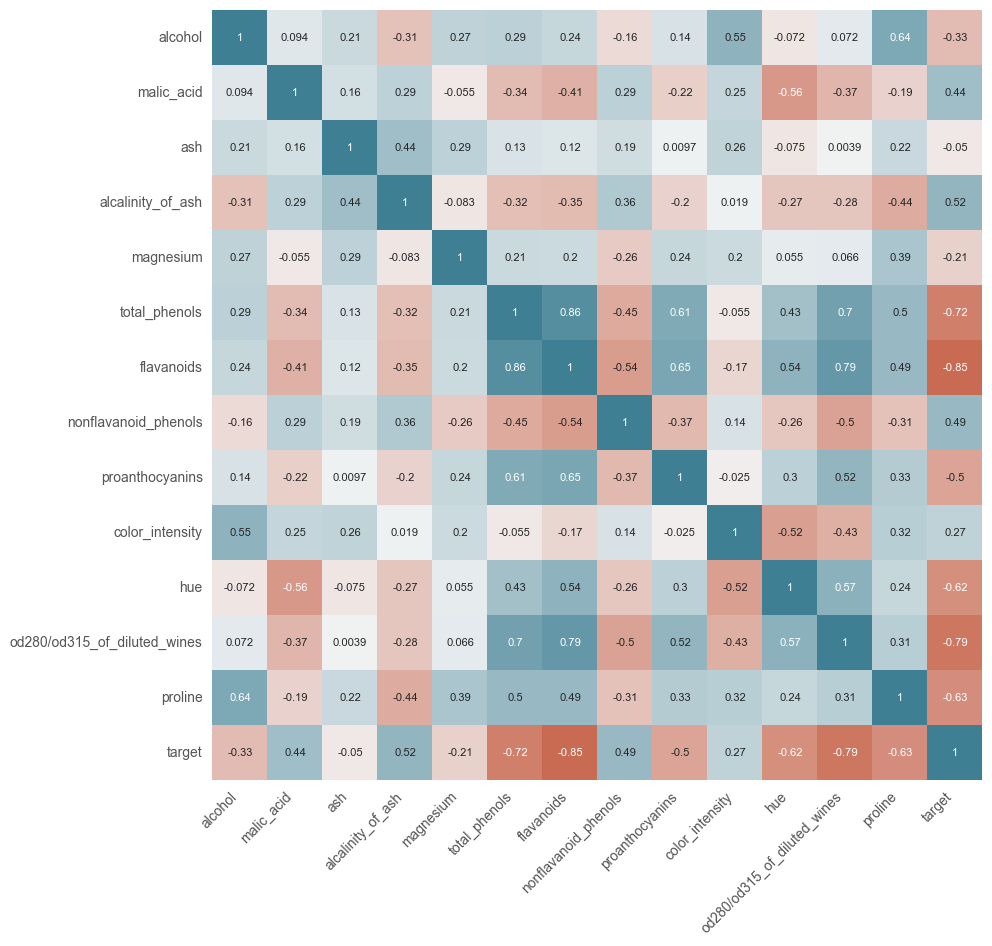

In [18]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

IndexError: index 4 is out of bounds for axis 0 with size 4

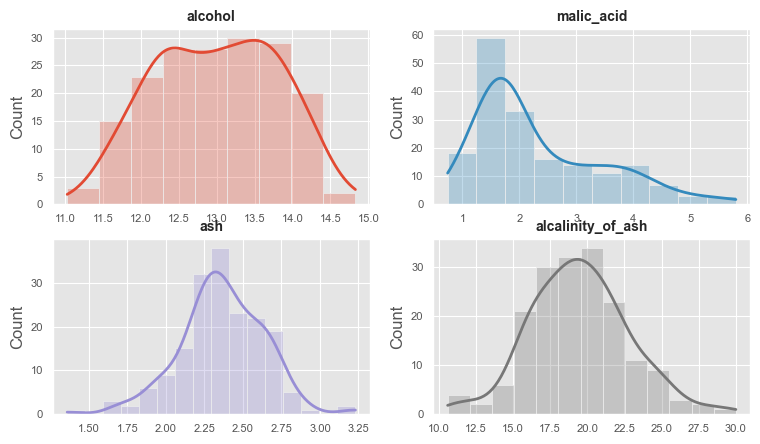

In [19]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

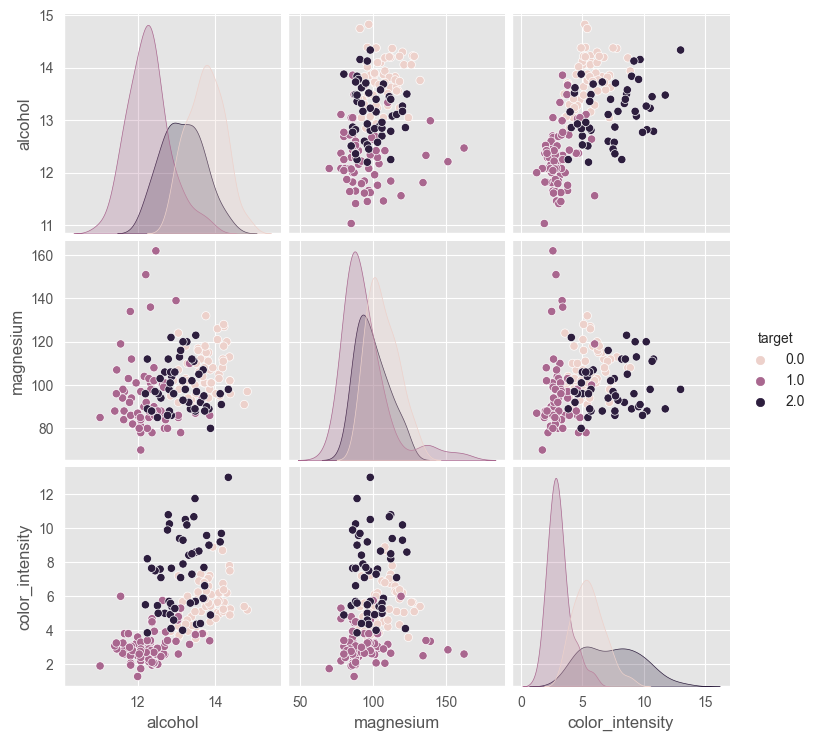

In [20]:
df = datos[['alcohol','magnesium','color_intensity','target']]
sns.pairplot(df,hue='target')

In [21]:
# Reduccion de dimenciones
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Confeccion de x e y
x = datos.loc[:,datos.columns != 'target'].values
y = datos.loc[:,['target']].values

x = pd.DataFrame(StandardScaler().fit_transform(x))
y = pd.DataFrame(y)

# Creacion del objeto.
pca = PCA(n_components=2)

# Ejecucion de PCA
pComp=pca.fit_transform(x)

principalDf = pd.DataFrame(data = pComp, columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [24]:
# División de los datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)


# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=[]
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=10, random_state=42)
modelo.fit(X_train,y_train.values.ravel())

scores=cross_val_score(modelo, X_train, y_train.values.ravel(),cv=5)
scores

array([1.        , 0.91666667, 0.91666667, 0.91666667, 0.95652174])

In [25]:
print("Mean: %0.2f ; Standard Dev.: %0.2f)" % (scores.mean(), scores.std()))

Mean: 0.94 ; Standard Dev.: 0.03)


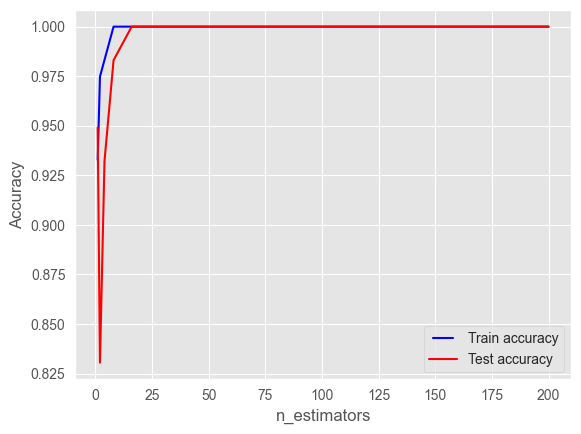

In [27]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import accuracy_score

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   clf = RandomForestClassifier(n_estimators=estimator,random_state=42)
   clf.fit(X_train,y_train.values.ravel())
   pred_train = clf.predict(X_train)
   acc_score_train = accuracy_score(y_train,pred_train)
   train_results.append(acc_score_train)
   pred_test = clf.predict(X_test)
   acc_score_test=accuracy_score(y_test,pred_test)
   test_results.append(acc_score_test)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()

# DecisionTreeClassifier

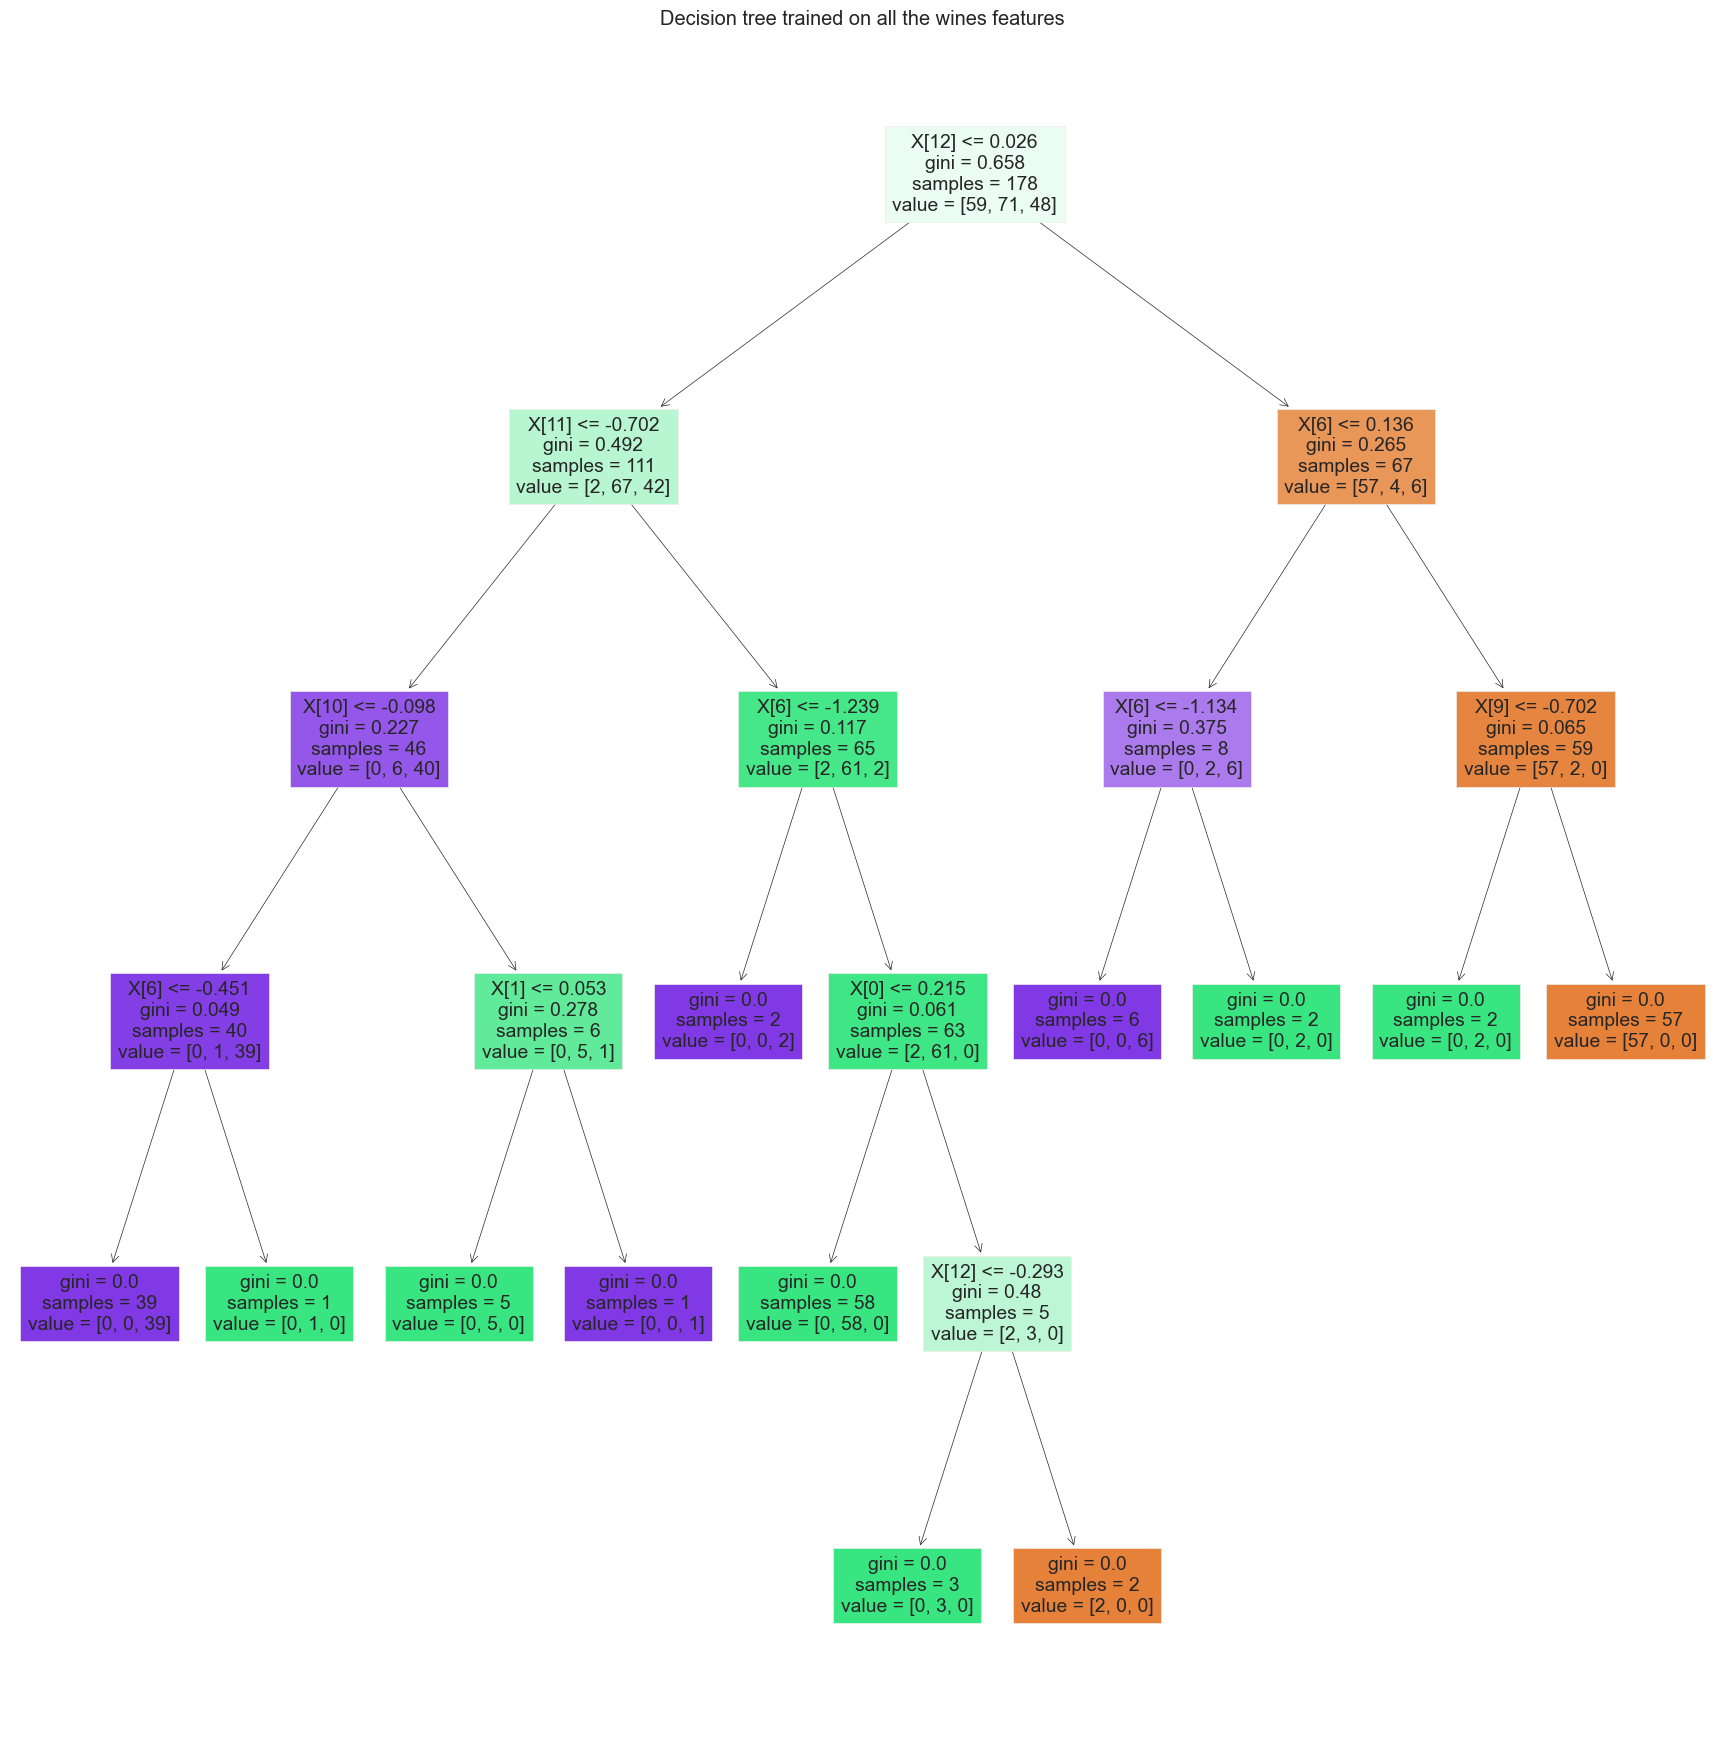

In [45]:
from sklearn import tree

plt.figure(figsize=(22,22))

clf = tree.DecisionTreeClassifier().fit(wine.data, wine.target)

tree.plot_tree(clf, filled=True)
plt.title('Decision tree trained on all the wines features')
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(wine.data, wine.target)
r = export_text(decision_tree, feature_names=wine['feature_names'])
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- class: 1
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- class: 0

